In [1]:
import re
import numpy as np
import pandas as pd 
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
import os
DATA_FOLDER = '../../data'
for dirname, _, filenames in os.walk(DATA_FOLDER):
    for filename in filenames:
        print(os.path.join(dirname, filename))

../../data/jigsaw-toxic-comment-train-google-pt-cleaned.csv
../../data/validation.csv
../../data/jigsaw-toxic-comment-train-google-it-cleaned.csv
../../data/jigsaw-toxic-comment-train-google-ru-cleaned.csv
../../data/jigsaw-toxic-comment-train-google-ru.csv
../../data/jigsaw-unintended-bias-train.csv
../../data/train_cleaned.csv
../../data/jigsaw-toxic-comment-train-google-es.csv
../../data/jigsaw-toxic-comment-train-google-fr-cleaned.csv
../../data/jigsaw-toxic-comment-train-google-es-cleaned.csv
../../data/validation-processed-seqlen128.csv
../../data/jigsaw-train-multilingual-coments-google-api.zip
../../data/jigsaw-toxic-comment-train-processed-seqlen128.csv
../../data/jigsaw-toxic-comment-train-google-fr.csv
../../data/jigsaw-toxic-comment-train-google-it.csv
../../data/jigsaw-unintended-bias-train-processed-seqlen128.csv
../../data/validation_cleaned.csv
../../data/jigsaw-toxic-comment-train-google-tr-cleaned.csv
../../data/jigsaw-toxic-comment-train-google-tr.csv
../../data/jigs

In [12]:
from os.path import join as opj
submissions = {}
for dirname, _, filenames in os.walk(DATA_FOLDER + '/submissions'):
    aucs = []
    for filename in filenames:
        auc = re.search(r"(\d)+", filename).group(0)
        aucs.append(int(auc))
        submissions[auc] = pd.read_csv(os.path.join(dirname, filename))['toxic']

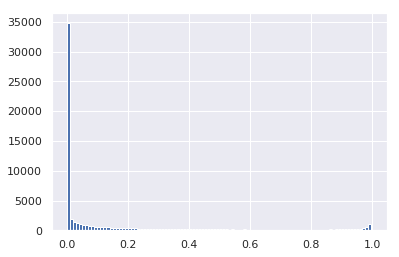

In [3]:
sns.set()
plt.hist(submissions['09423'],bins=100)
plt.show()

63812


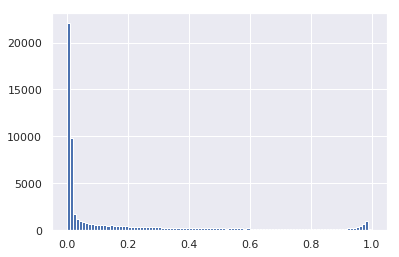

In [56]:
plt.hist(submissions['09459'], bins=100,)
# plt.xlim(0.1,1)
print(len(submissions['09459']))
# print(np.argwhere(np.isnan(submissions['09459'])))

In [6]:
df_submissions = pd.DataFrame(submissions)

          09459     09423     09353     09378     09401     09348
09459  1.000000  0.972256  0.947626  0.945206  0.941762  0.936762
09423  0.972256  1.000000  0.949458  0.910542  0.952652  0.921951
09353  0.947626  0.949458  1.000000  0.927010  0.953925  0.936209
09378  0.945206  0.910542  0.927010  1.000000  0.905120  0.929255
09401  0.941762  0.952652  0.953925  0.905120  1.000000  0.925112
09348  0.936762  0.921951  0.936209  0.929255  0.925112  1.000000


<Figure size 3000x2000 with 0 Axes>

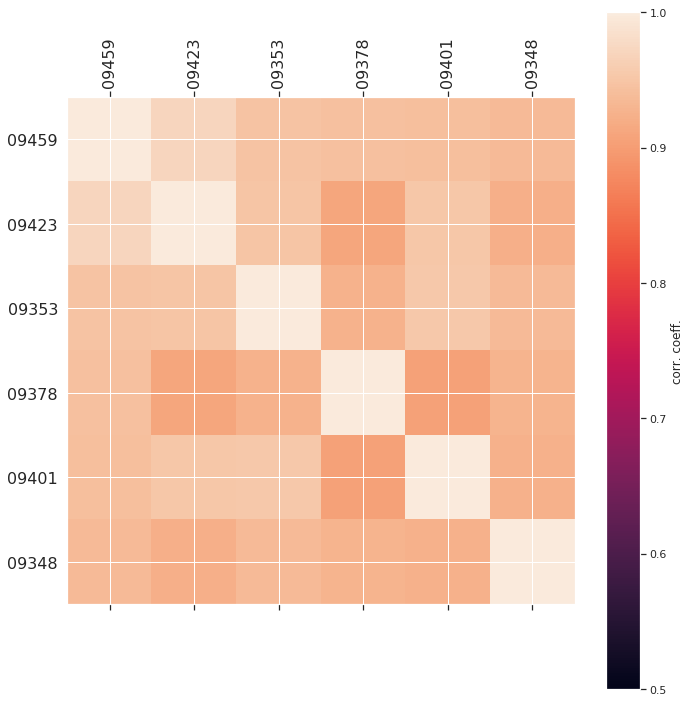

In [60]:
plt.figure(dpi=500)
corrmat = df_submissions.corr()
# use the absolute value of the correlation matrix for sorting!
all_cols = np.abs(corrmat).sort_values('09459',ascending=False)['09459'].index 
# all_cols = corrmat.sort_values('Y1',ascending=False)['Y1'].index 
cols = all_cols[:10] 

cm = corrmat.loc[cols,cols]
print(cm)
plt.figure(figsize=(10,10))
plt.matshow(cm,vmin=0.5,vmax=1, fignum=0)
plt.colorbar(label='corr. coeff.')
tick_names = [col for col in list(cols)]
plt.xticks(np.arange(cm.shape[0]),tick_names,
           rotation=90, fontsize=16)
plt.yticks(np.arange(cm.shape[0]),tick_names,
          fontsize=16)
plt.tight_layout()
plt.show()

In [58]:

sub = pd.read_csv(DATA_FOLDER + '/sample_submission.csv')
low  =  ((submissions['09459'] < 0.2) & (submissions['09423'] < 0.2))
high =  ((submissions['09459'] > 0.8) & (submissions['09423'] > 0.8))
# print(len(indices))
# xor.sum()/len(xor)

In [51]:
a = 0.70
indices = np.arange(len(sub['toxic']))
values = np.empty(indices[-1]+1)                 
for i in indices:
    if i in indices[high]:
        values[i] = 1.0
    elif i in indices[low]:
        values[i] = 0.0
    else:
        values[i] = submissions['09459'][i]*a + submissions['09401'][i]*(1-a)

In [52]:
sub['toxic'] = values

In [8]:
def cutoff(x):
    flags = np.linspace(0,1,40001)
    if x >= 0.7:
        return 1.0
    elif x <= 0.4:
        return 0
    else:
        return x
cutoff(0.6)

0.6

In [10]:
submissions['09459'] = submissions['09459'].apply(cutoff)
submissions['09401'] = submissions['09401'].apply(cutoff)

In [15]:
np.corrcoef(submissions['09401'], submissions['09459'])

array([[1.        , 0.94176206],
       [0.94176206, 1.        ]])

In [ ]:
# sub['toxic'] = (sub['toxic'] > 0.5 )*1

In [12]:
sub['toxic'] = sub['toxic'].apply(cutoff)

In [13]:
toxic_bool = sub["toxic"] > 0.5

In [14]:
toxic_bool.mean()

0.15015984454334608

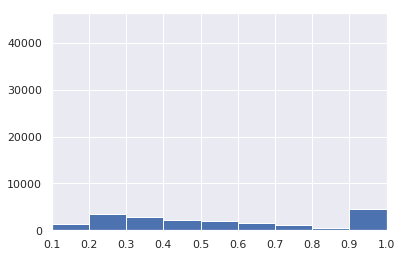

In [53]:
plt.hist(sub['toxic'], bins=10)
plt.xlim(0.1,1)
plt.show()

In [ ]:
sub.to_csv('submission.csv', index=False)

In [ ]:
sub.head()